In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 5.1 MB/s 
     |████████████████████████████████| 511.7 MB 6.3 kB/s 
     |████████████████████████████████| 1.6 MB 48.4 MB/s 
     |████████████████████████████████| 5.8 MB 58.3 MB/s 
     |████████████████████████████████| 438 kB 66.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninst

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3")
encoder_inputs = preprocessor(text_input)


In [ ]:
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = preprocessor(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = preprocessor(text_input)
outputs = bert_encoder(preprocessed_text)
layer = outputs['pooled_output']
layer=tf.keras.layers.Dense(128)(layer)
layer=tf.keras.layers.BatchNormalization()(layer)
layer=tf.keras.layers.Activation('relu')(layer)
layer=tf.keras.layers.Dropout(0.5)(layer)
layer=tf.keras.layers.Dense(64)(layer)
layer=tf.keras.layers.BatchNormalization()(layer)
layer=tf.keras.layers.Activation('relu')(layer)
layer=tf.keras.layers.Dropout(0.5)(layer)
output = tf.keras.layers.Dense(33, activation='softmax', name="output")(layer)

In [ ]:
model = tf.keras.Model(inputs=[text_input], outputs = [output])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_1 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

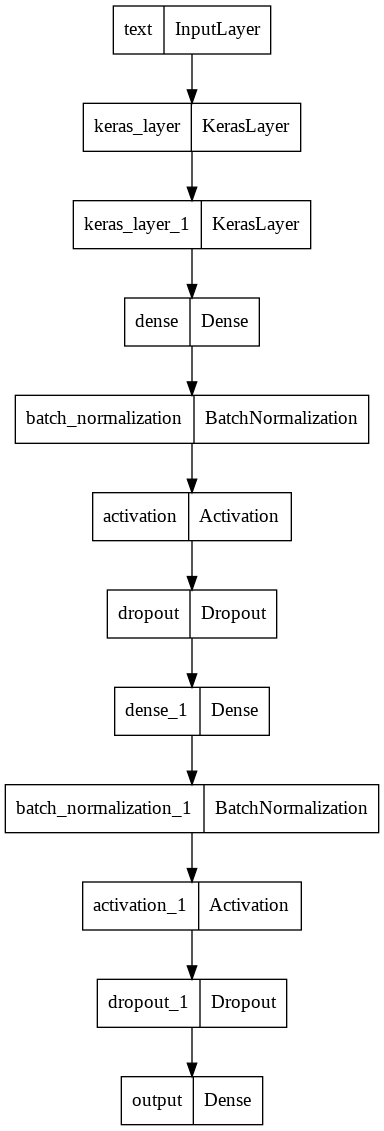

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/minor/data10.csv')

In [ ]:
df2

,y,content
0,expiration_date,ನನ್ನ ವೀಸಾ ಕಾರ್ಡ್ ಅವಧಿ ಮುಗಿದ ದಿನಾಂಕ ಯಾವುದು
1,expiration_date,ದಯವಿಟ್ಟು ನನ್ನ ವೀಸಾ ಕ್ರೆಡಿಟ್ ಕಾರ್ಡ್‌ನಲ್ಲಿ ಮುಕ್ತ...
2,expiration_date,ವೀಸಾದಿಂದ ನನ್ನ ಕ್ರೆಡಿಟ್ ಕಾರ್ಡ್ ದಯವಿಟ್ಟು ಅವಧಿ ಮು...
3,expiration_date,ನನ್ನ ವೀಸಾ ಕಾರ್ಡ್‌ನಲ್ಲಿರುವ ಮುಕ್ತಾಯ ದಿನಾಂಕ ನಿಮಗೆ...
4,expiration_date,ನೀವು ಮುಕ್ತಾಯ ದಿನಾಂಕವನ್ನು ಕಂಡುಹಿಡಿಯಬಹುದೇ ಮತ್ತು ...
...,...,...
4916,translate,ನಾಯಿಗಾಗಿ ಇಂಗ್ಲಿಷ್ ಟು ಸ್ಪ್ಯಾನಿಷ್
4917,translate,ಸ್ಪ್ಯಾನಿಷ್ ಭಾಷೆಯಲ್ಲಿ ನಾಯಿ ಎಂದರೇನು
4918,translate,ಸ್ಪ್ಯಾನಿಷ್ ಭಾಷೆಯಲ್ಲಿ ನಾಯಿ ಹೇಗೆ ಹೇಳುತ್ತೀರಿ
4919,translate,ಸ್ಪ್ಯಾನಿಷ್ ಭಾಷೆಯಲ್ಲಿ ನಾಯಿ


In [ ]:
class_size=df2.groupby('y').size()

In [ ]:
class_size

y
application_status           150
balance                      150
book_hotel                   150
car_rental                   150
card_declined                149
change_speed                 147
credit_limit_change          150
current_location             150
direct_deposit               150
expiration_date              150
flight_status                150
income                       150
ingredients_list             150
interest_rate                150
last_maintenance             150
meeting_schedule             150
order                        149
order_checks                 147
order_status                 150
payday                       150
pin_change                   150
recipe                       150
replacement_card_duration    150
schedule_maintenance         150
time                         148
timer                        148
traffic                      148
transfer                     149
translate                    150
weather                      149
what_are

In [ ]:
# plt.figure(figsize=(30,30))
# plt.bar(class_size.index,class_size.values)

In [ ]:
df3=pd.get_dummies(df2.y)

In [ ]:
df3

,application_status,balance,book_hotel,car_rental,card_declined,change_speed,credit_limit_change,current_location,direct_deposit,expiration_date,...,schedule_maintenance,time,timer,traffic,transfer,translate,weather,what_are_your_hobbies,what_can_i_ask_you,what_song
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df4=pd.concat([df2,df3],axis=1)

In [ ]:
df4

,y,content,application_status,balance,book_hotel,car_rental,card_declined,change_speed,credit_limit_change,current_location,...,schedule_maintenance,time,timer,traffic,transfer,translate,weather,what_are_your_hobbies,what_can_i_ask_you,what_song
0,expiration_date,ನನ್ನ ವೀಸಾ ಕಾರ್ಡ್ ಅವಧಿ ಮುಗಿದ ದಿನಾಂಕ ಯಾವುದು,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,expiration_date,ದಯವಿಟ್ಟು ನನ್ನ ವೀಸಾ ಕ್ರೆಡಿಟ್ ಕಾರ್ಡ್‌ನಲ್ಲಿ ಮುಕ್ತ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,expiration_date,ವೀಸಾದಿಂದ ನನ್ನ ಕ್ರೆಡಿಟ್ ಕಾರ್ಡ್ ದಯವಿಟ್ಟು ಅವಧಿ ಮು...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,expiration_date,ನನ್ನ ವೀಸಾ ಕಾರ್ಡ್‌ನಲ್ಲಿರುವ ಮುಕ್ತಾಯ ದಿನಾಂಕ ನಿಮಗೆ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,expiration_date,ನೀವು ಮುಕ್ತಾಯ ದಿನಾಂಕವನ್ನು ಕಂಡುಹಿಡಿಯಬಹುದೇ ಮತ್ತು ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,translate,ನಾಯಿಗಾಗಿ ಇಂಗ್ಲಿಷ್ ಟು ಸ್ಪ್ಯಾನಿಷ್,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4917,translate,ಸ್ಪ್ಯಾನಿಷ್ ಭಾಷೆಯಲ್ಲಿ ನಾಯಿ ಎಂದರೇನು,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4918,translate,ಸ್ಪ್ಯಾನಿಷ್ ಭಾಷೆಯಲ್ಲಿ ನಾಯಿ ಹೇಗೆ ಹೇಳುತ್ತೀರಿ,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4919,translate,ಸ್ಪ್ಯಾನಿಷ್ ಭಾಷೆಯಲ್ಲಿ ನಾಯಿ,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
x=np.asarray(df2.content)
y=np.asarray(df3)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [ ]:
# X_train=np.asarray(X_train)
# Y_train=np.asarray(Y_train)

In [ ]:
z1=model5.fit(X_train,Y_train,epochs=80)

Epoch 1/80
116/116 [==============================] - 43s 339ms/step - loss: 0.4840 - accuracy: 0.8466
Epoch 2/80
116/116 [==============================] - 38s 331ms/step - loss: 0.4768 - accuracy: 0.8561
Epoch 3/80
116/116 [==============================] - 39s 335ms/step - loss: 0.4456 - accuracy: 0.8637
Epoch 4/80
116/116 [==============================] - 39s 332ms/step - loss: 0.4567 - accuracy: 0.8564
Epoch 5/80
116/116 [==============================] - 38s 328ms/step - loss: 0.4469 - accuracy: 0.8623
Epoch 6/80
116/116 [==============================] - 38s 331ms/step - loss: 0.4480 - accuracy: 0.8604
Epoch 7/80
116/116 [==============================] - 38s 329ms/step - loss: 0.4501 - accuracy: 0.8672
Epoch 8/80
116/116 [==============================] - 38s 326ms/step - loss: 0.4386 - accuracy: 0.8648
Epoch 9/80
116/116 [==============================] - 38s 327ms/step - loss: 0.4575 - accuracy: 0.8604
Epoch 10/80
116/116 [==============================] - 39s 332ms/step - l

KeyboardInterrupt: ignored

In [ ]:
model.save('drive/MyDrive/minor/model2/model.h5')

In [ ]:
model.save_weights('drive/MyDrive/minor/weights2/weights')

In [ ]:
model5=tf.keras.models.load_model('/content/drive/MyDrive/minor/model.h5',custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
model5.evaluate(X_test,Y_test)

39/39 [==============================] - 15s 316ms/step - loss: 0.4895 - accuracy: 0.8684


[0.4894826114177704, 0.8683996796607971]

In [ ]:
model5.evaluate(X_train,Y_train)

116/116 [==============================] - 39s 340ms/step - loss: 0.0609 - accuracy: 0.9886


[0.06089227646589279, 0.9886178970336914]

In [ ]:
z1=model5.predict(X_test)

39/39 [==============================] - 14s 345ms/step


In [ ]:
value=[]
for i in z1:
  value.append(np.argmax(i))

In [ ]:
value1=[]
for i in Y_test:
  value1.append(np.argmax(i))

In [ ]:
ann_accuracy = accuracy_score(value1,value)
ann_precision, ann_recall, ann_f_score, ann_support = precision_recall_fscore_support(value1, value, average='macro')
print(f'Accuracy: {ann_accuracy * 100:.2f} %')
print(f'Precision: {ann_precision * 100:.2f} %')
print(f'Recall: {ann_recall * 100:.2f} %')
print(f'F-Score: {ann_f_score * 100:.2f} %')

Accuracy: 86.84 %
Precision: 86.81 %
Recall: 87.12 %
F-Score: 86.74 %


In [ ]:
cm=confusion_matrix(value,value1)

In [ ]:
cm

array([[29,  0,  0, ...,  0,  0,  0],
       [ 0, 32,  0, ...,  0,  0,  0],
       [ 0,  0, 32, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 29,  3,  0],
       [ 1,  0,  0, ...,  0, 36,  0],
       [ 0,  0,  0, ...,  0,  0, 35]])

Text(0.5, 15.0, 'Actual Labels')

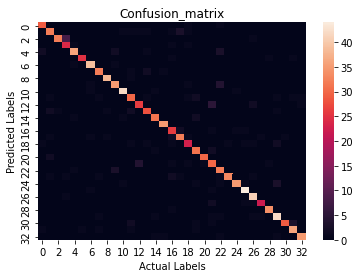

In [ ]:
ax=plt.subplot()
plt.rcParams["figure.figsize"] = (32,32)
sns.heatmap(cm,ax=ax)
ax.set_title('Confusion_matrix')
ax.set_ylabel('Predicted Labels')
ax.set_xlabel('Actual Labels')


In [ ]:
classes=list(df2.y.unique())
classes.sort()

In [ ]:
def find_intent(sentence):
  x=np.asarray([sentence])
  y=model5.predict(x)
  z=np.argmax(y)
  return classes[z]

In [ ]:
find_intent('ನಾಯಿಯ ಸ್ಪ್ಯಾನಿಷ್ ಪದ ಯಾವುದು') #What is the Spanish word for dog?

1/1 [==============================] - 0s 31ms/step


'translate'

In [ ]:
find_intent('ನನ್ನ ಖಾತೆಯ ಬ್ಯಾಲೆನ್ಸ್ ಎಷ್ಟು') #What is my account balance?


1/1 [==============================] - 0s 27ms/step


'balance'